# Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
# add library tree module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/..")

In [59]:
import numpy as np
from random import randint
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import graphviz
from graphviz import Source

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from woodpecker.decision_tree_structure_regressor import DecisionTreeStructureRegressor


# Load dataset

In [4]:
dataset = pd.read_csv("../resources/dataset/train_titanic.csv")

# Feature enginner

In [5]:
# Age
dataset["Age_na"] = dataset["Age"].isna().astype(int)
dataset.fillna({"Age":dataset.median()["Age"]}, inplace=True)

#Sex
dataset["Sex_label"] = dataset["Sex"].astype("category").cat.codes

#Cabin
dataset["Cabin_label"] = dataset["Cabin"].astype("category").cat.codes

# Embarked
dataset["Embarked_label"] = dataset["Embarked"].astype("category").cat.codes

# Select features and target variables

In [6]:
features = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target = "Age"

# Train/validation split

In [7]:
random_state = 1987
train, valid = train_test_split(dataset, test_size = 0.2, stratify = dataset.Survived, random_state=random_state)

# Train model

In [8]:
max_depth = 3

In [88]:
model = DecisionTreeRegressor()
_ = model.fit(train[features], train[target])

# Validation

In [89]:
mean_absolute_error(valid[target], model.predict(valid[features]))

10.792124295629883

# Model interpretation

In [90]:
dts = DecisionTreeStructureRegressor(model, train, features, target)

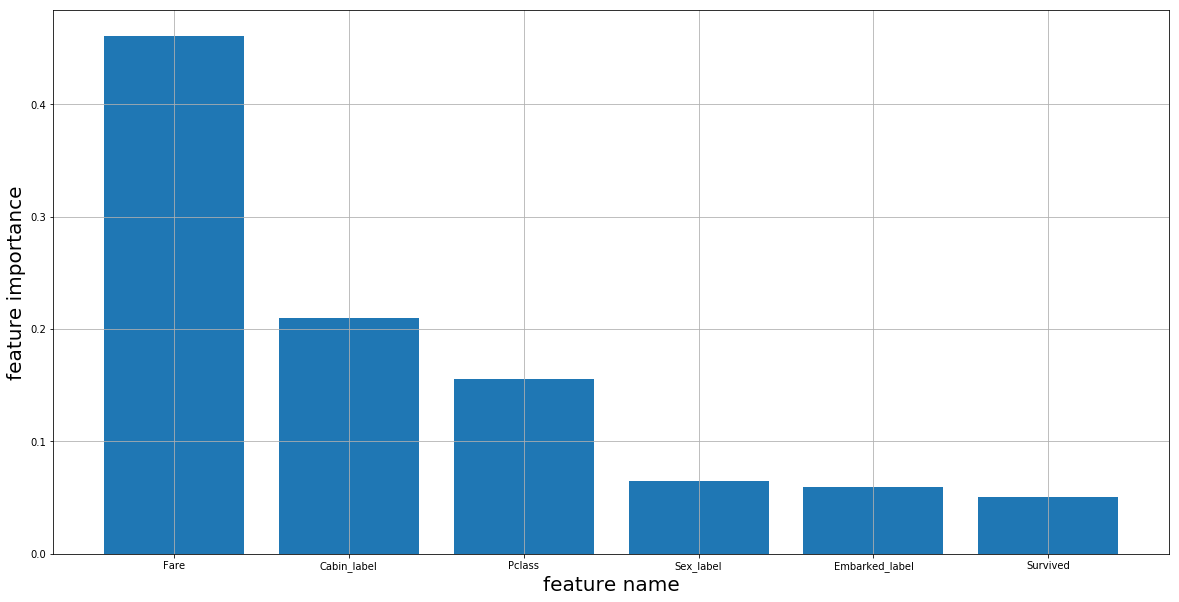

In [91]:
dts.show_features_importance()

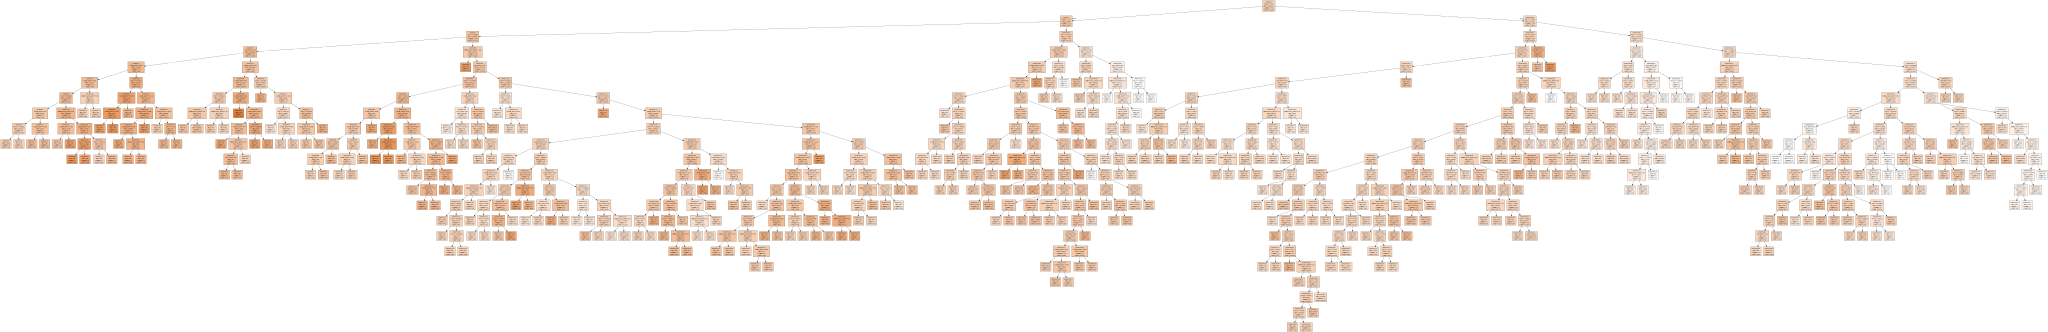

In [92]:
dts.show_decision_tree_structure(rotate=False)

In [93]:
print(f"Node count {dts.get_node_count()}, leaf count {dts.get_leaf_node_count()}, split count {dts.get_split_node_count()} ")

Node count 767, leaf count 384, split count 383 


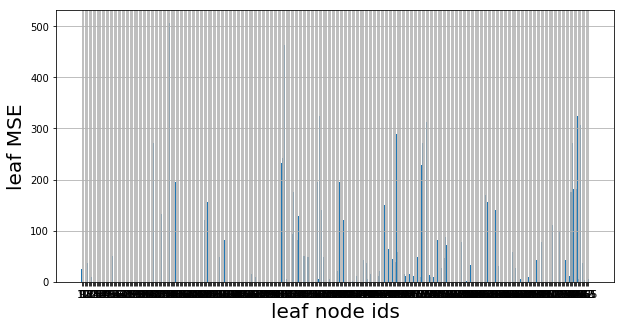

In [94]:
dts.show_leaf_regression_criteria()

In [95]:
dts.show_leaf_samples(display_type="text")

9 2
10 1
12 1
13 1
16 2
17 1
20 1
21 2
23 1
24 1
26 1
27 1
31 1
32 1
33 1
37 1
39 1
40 1
41 1
43 1
45 1
46 1
51 1
52 3
54 1
55 1
57 1
60 1
63 1
64 1
65 1
67 1
68 1
70 1
73 1
75 1
76 4
79 1
80 2
81 1
83 1
91 1
92 1
93 1
96 2
97 1
98 1
99 1
102 1
104 1
105 1
108 1
110 1
111 1
115 2
117 1
118 1
120 1
121 1
122 1
125 2
127 1
128 1
131 1
133 1
134 1
135 2
138 1
140 1
141 1
143 1
151 2
153 2
155 1
156 1
157 1
158 1
159 1
164 1
166 1
167 1
170 1
171 1
172 1
174 1
175 1
179 1
180 1
182 1
183 1
186 1
187 1
190 1
191 2
193 1
194 2
201 1
202 1
203 1
206 1
208 1
209 1
210 2
214 1
215 2
216 1
217 1
219 1
220 2
222 1
224 2
226 1
227 1
233 1
237 1
238 1
240 1
242 1
243 1
245 1
246 1
250 1
251 1
253 1
254 1
256 1
258 1
259 1
261 2
262 1
263 1
267 2
268 1
272 1
273 1
274 2
276 1
277 1
280 1
281 1
282 1
288 1
290 1
294 1
295 1
296 1
298 1
301 1
302 1
303 1
308 5
311 14
313 4
314 2
315 1
316 4
320 1
321 1
324 1
325 20
327 3
330 1
331 2
333 2
334 11
340 1
341 1
342 1
348 8
350 1
351 1
353 2
354 1
355 1
35

In [103]:
dts.get_node_samples(551).describe()

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived,Age
count,27.0,2.700000e+01,27.0,27.0,27.0,27.0,27.000000
mean,3.0,7.895800e+00,1.0,-1.0,2.0,0.0,27.518519
std,0.0,9.050976e-16,0.0,0.0,0.0,0.0,5.250424
min,3.0,7.895800e+00,1.0,-1.0,2.0,0.0,19.000000
25%,3.0,7.895800e+00,1.0,-1.0,2.0,0.0,24.500000
50%,3.0,7.895800e+00,1.0,-1.0,2.0,0.0,28.000000
75%,3.0,7.895800e+00,1.0,-1.0,2.0,0.0,28.000000
max,3.0,7.895800e+00,1.0,-1.0,2.0,0.0,40.000000


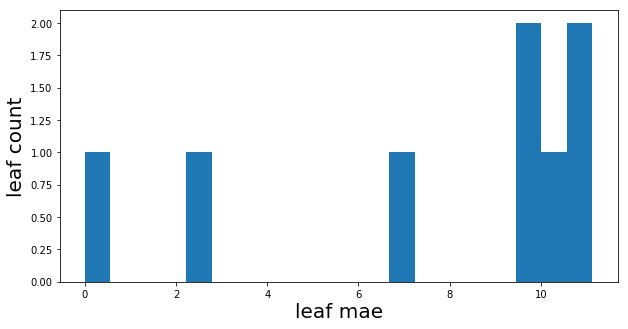

In [44]:
dts.show_leaf_regression_criteria_distribution(bins=20)


In [60]:
isinstance(model, DecisionTreeClassifier)

False

In [99]:
list(train.iloc[0][features])

[3, 7.8958, 1, -1, 2, 0]

INFO - Make a prediction for sample [3, 7.8958, 1, -1, 2, 0]
INFO - decision path [  0 406 407 408 460 461 462 463 464 532 538 542 543 547 549 551]


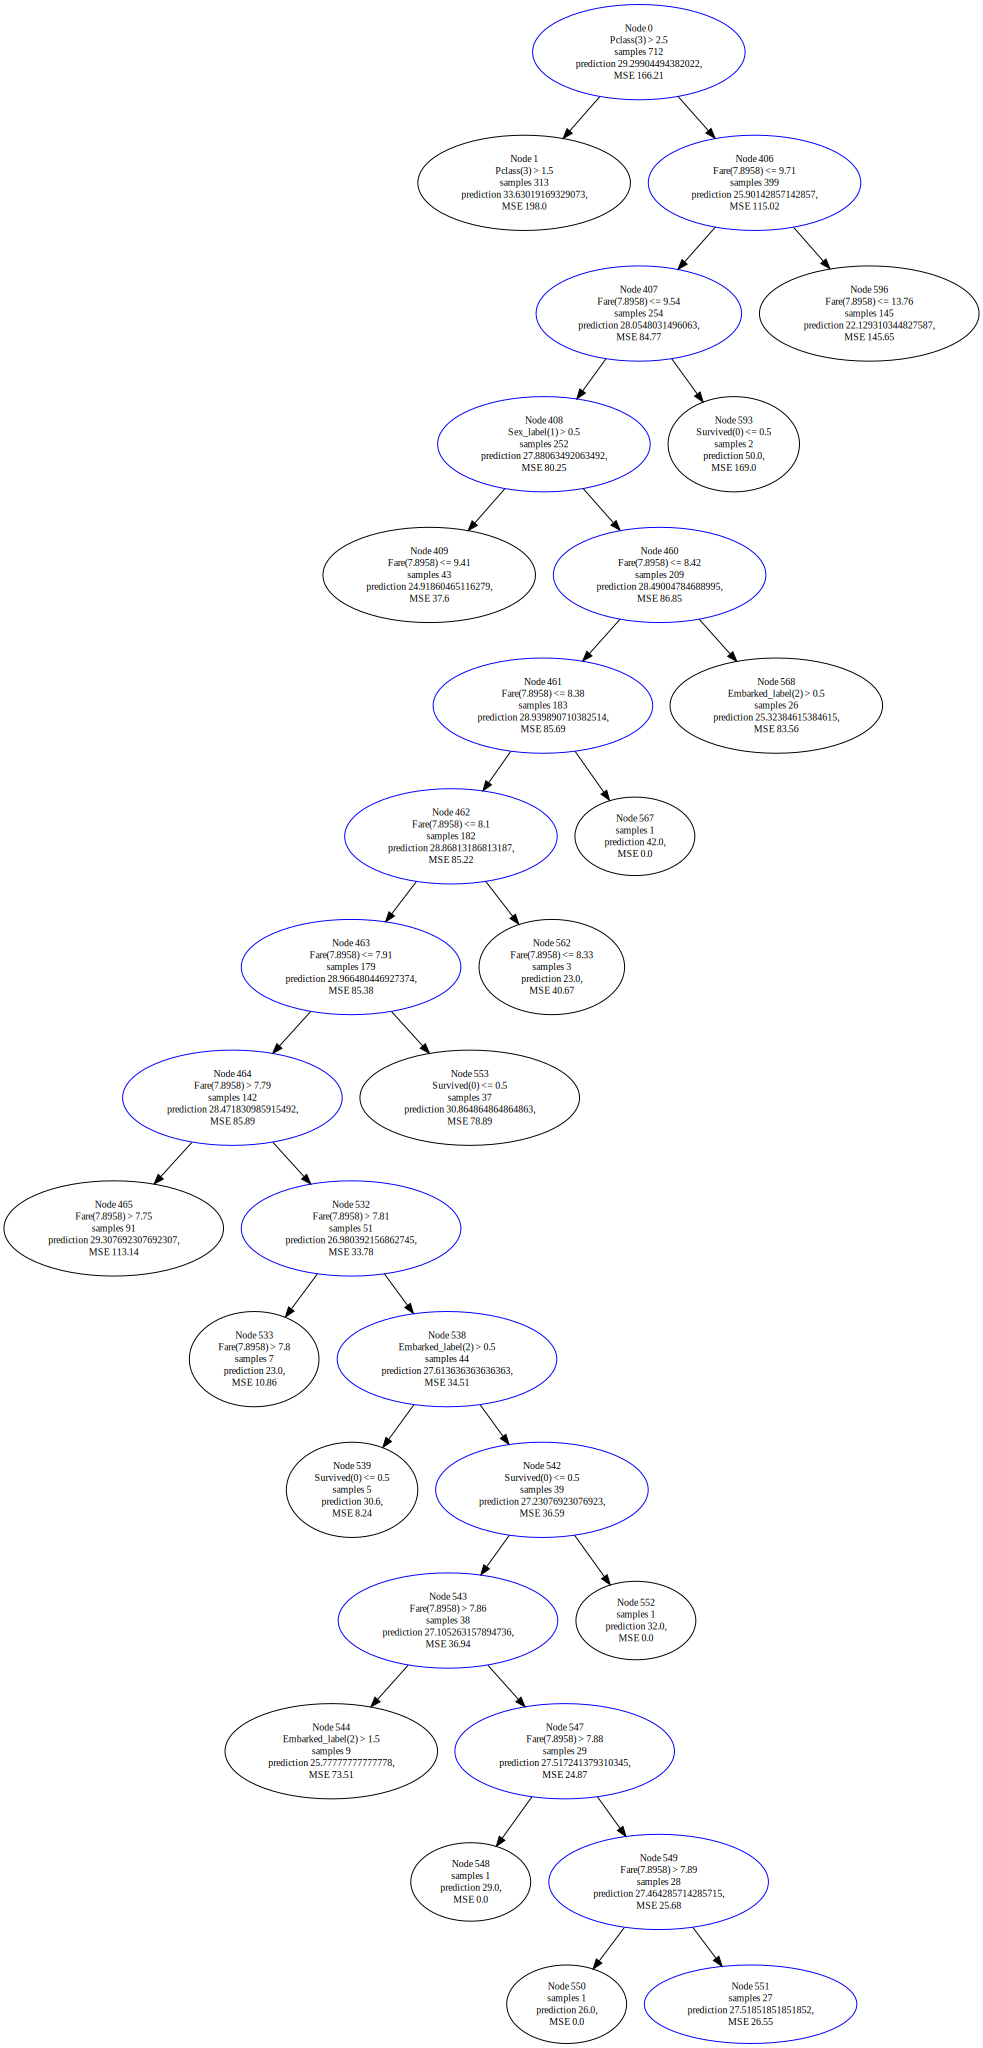

In [101]:
dts.show_decision_tree_prediction_path(list(train.iloc[0][features]))

In [68]:
dts.get_node_samples(node_id=11).describe()

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived,Age
count,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.0,26.256494,0.500000,3.176471,1.941176,0.500000,32.235294
std,0.0,0.579951,0.507519,24.352799,0.342997,0.507519,13.033892
min,2.0,26.000000,0.000000,-1.000000,0.000000,0.000000,2.000000
25%,2.0,26.000000,0.000000,-1.000000,2.000000,0.000000,26.250000
50%,2.0,26.000000,0.500000,-1.000000,2.000000,0.500000,33.000000
75%,2.0,26.000000,1.000000,-1.000000,2.000000,1.000000,42.000000
max,2.0,27.750000,1.000000,141.000000,2.000000,1.000000,54.000000
